#### Contribution: 

* yamini Guduru - Loaded the data, did some EDA & preprocessing required. Deployed the saved models using Flask.  
* Pavan Kalyan Meda - created Generator and Discriminator for WGAN along with WGAN Class. trained on the preprocessed images, generated few images and calculated Inception, FID scores. 


# Generated Images
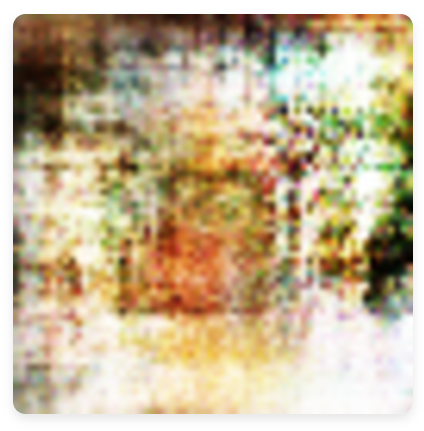
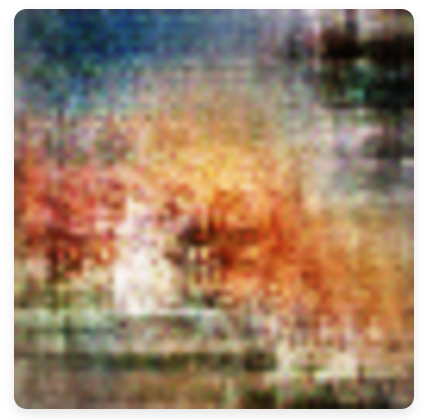
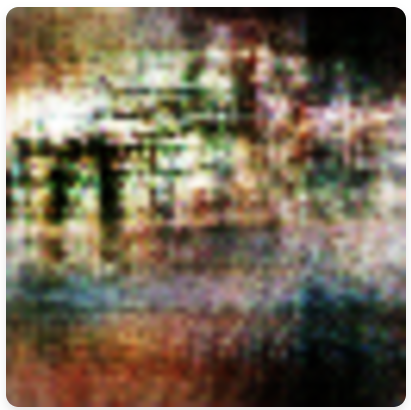
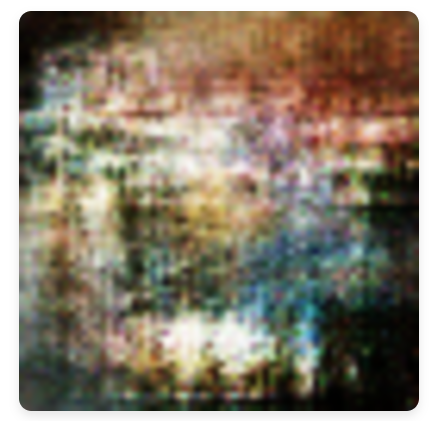
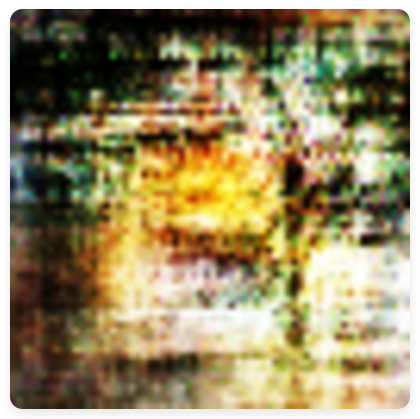

#### Scores
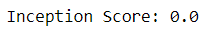


In [1]:
#Loading the basic modules. 
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

#For images handling.
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

#model & layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input, BatchNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping

import tensorflow as tf
from tensorflow.keras.preprocessing import image

In [2]:
df = pd.read_json('./yelp_photos/photos.json', lines=True)
df.head()

photo_id             business_id  \
0  zsvj7vloL4L5jhYyPIuVwg  Nk-SJhPlDBkAZvfsADtccA   
1  HCUdRJHHm_e0OCTlZetGLg  yVZtL5MmrpiivyCIrVkGgA   
2  vkr8T0scuJmGVvN2HJelEA  _ab50qdWOk0DdB6XOrBitw   
3  pve7D6NUrafHW3EAORubyw  SZU9c8V2GuREDN5KgyHFJw   
4  H52Er-uBg6rNrHcReWTD2w  Gzur0f0XMkrVxIwYJvOt2g   

                                             caption    label  
0  Nice rock artwork everywhere and craploads of ...   inside  
1                                                     outside  
2                                     oyster shooter    drink  
3                                      Shrimp scampi     food  
4                                                        food

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200100 entries, 0 to 200099
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   photo_id     200100 non-null  object
 1   business_id  200100 non-null  object
 2   caption      200100 non-null  object
 3   label        200100 non-null  object
 4   image_path   200100 non-null  object
dtypes: object(5)
memory usage: 7.6+ MB


In [27]:
df['label'].value_counts()

food       108152
inside      56031
outside     18569
drink       15670
menu         1678
Name: label, dtype: int64

In [3]:
df['photo_id'] = df['photo_id']+'.jpg'
df['image_path'] = './yelp_photos/photos/'+df['photo_id']

In [4]:
import os
files_found = os.listdir('./yelp_photos/photos')
print("Photos found are:", files_found)

Photos found are: ['--0h6FMC0V8aMtKQylojEg.jpg', '--3JQ4MlO-jHT9xbo7liug.jpg', '--3P3fjPrScy06XVLi4vhg.jpg', '--4DfhW2sJvjeC90KEDX3g.jpg', '--5V3mRlhb3zqE5yF4Gpaw.jpg', '--7SiWWk_OHbdmcU4pNDQw.jpg', '--8pNvGp9ICBjJVck2OnTQ.jpg', '--9cH8_rrskfmYvONaJpgQ.jpg', '--9zKbcEd-DXH4ZUiEI4UA.jpg', '--AU_cPMgrWSPluP1v8n_Q.jpg', '--CXLzKP6hhYVs54GVOT0Q.jpg', '--cxOTSQzInwUOAPwceUuA.jpg', '--dacvi4Y_8ACp-10nafMA.jpg', '--dM6T1gVl050fS_vkV3Xg.jpg', '--DqlLaO1I0D7uFgvRInww.jpg', '--e8vgtonVwPXG3n6lfBLA.jpg', '--EjX0WhEFSDVv9mtAeiOQ.jpg', '--FrnLlpbF2_dRRlZ_dovg.jpg', '--Giyv3aAypzllFEp5d8Eg.jpg', '--gjH9oA92f7OuTSovXjCg.jpg', '--GXT_8apxBAs7epcHf-zA.jpg', '--hMxFnB1b_UeDwzsOCmCA.jpg', '--HO-fMoTVbYnxVZdWAIGQ.jpg', '--I-ThZdBaYfbSlAQhfOfQ.jpg', '--IHD2ZgFPfFMR4qMkLzFA.jpg', '--j4xVIdIlYpOmZbs7iszg.jpg', '--J8VXQsdPNxPXKCRyqakg.jpg', '--k9FyNj0Ztr08wutGppYA.jpg', '--Kofko5jy33_vPJOEt4Ow.jpg', '--KPaOH7QLrQ1DliVmoacA.jpg', '--kP__1IcWsQE0ycWKT0bg.jpg', '--lRwPamtV4WMbl3MMhRCw.jpg', '--MwzZ4ODNvGO877myxJ

In [5]:
filtered_df = df[df['photo_id'].isin(files_found)]

In [28]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21844 entries, 9 to 200095
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   photo_id     21844 non-null  object
 1   business_id  21844 non-null  object
 2   caption      21844 non-null  object
 3   label        21844 non-null  object
 4   image_path   21844 non-null  object
dtypes: object(5)
memory usage: 1023.9+ KB


In [29]:
filtered_df['label'].value_counts()

food       11761
inside      6105
outside     2023
drink       1779
menu         176
Name: label, dtype: int64

In [6]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import display, Image

def display_image(image_path):
    img = mpimg.imread(image_path)  # Read the image
    plt.figure(figsize=(6,6))  # Optional: adjust the size of the image
    plt.imshow(img)  # Display the image
    plt.axis('off')  # Remove axes
    plt.show()  # Show the imagenum_classes = len(categories)

Displaying an image from the label: 'inside' 


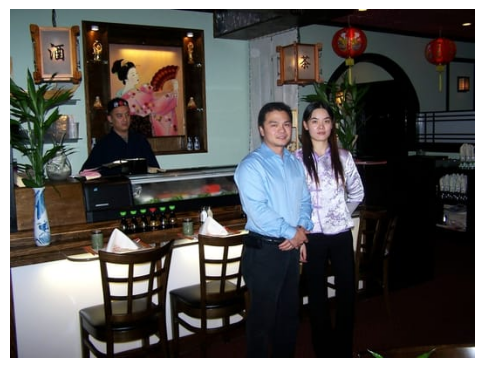

Displaying an image from the label: 'food' 


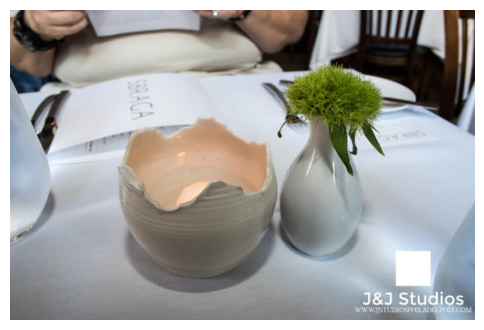

Displaying an image from the label: 'outside' 


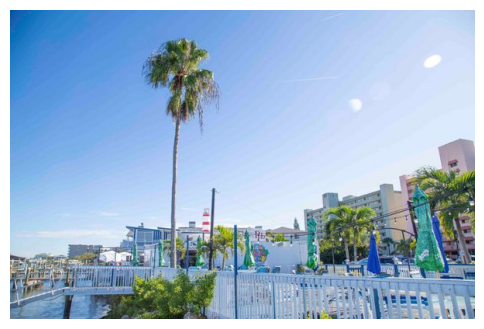

Displaying an image from the label: 'drink' 


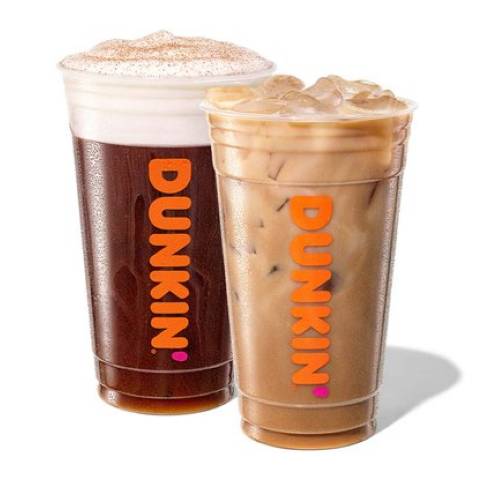

Displaying an image from the label: 'menu' 


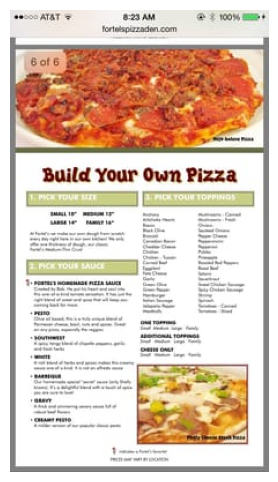

In [7]:
labels = filtered_df['label'].unique()

for label in labels:
    label_data = filtered_df[filtered_df['label'] == label].sample(n=1)
    image_path = label_data['image_path'].values[0]
    print(f"Displaying an image from the label: '{label}' ")
    display_image(image_path)

In [8]:
# Function to load and preprocess images
def image_preprocessing( labels, img_size = 64, label_sample_size = 150):
    X_train = []
    y_train = []
    for idx, label in enumerate(labels):
        sample_df = filtered_df[filtered_df['label'] == label].sample(n=label_sample_size)
        for image_path in sample_df['image_path']:
            img = load_img(image_path, target_size=(img_size, img_size))
            img_array = img_to_array(img)
            img_array = (img_array - 127.5) / 127.5
            X_train.append(img_array)
            y_train.append(idx)
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    return X_train, y_train

In [9]:
# Load and preprocess images
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
X_train, y_train = image_preprocessing(labels)

In [10]:
print(X_train.shape, y_train.shape)

(750, 64, 64, 3) (750,)


### WGAN Model

In [12]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Conv2D, Conv2DTranspose
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop
import numpy as np

In [11]:
train_dataset = tf.data.Dataset.from_tensor_slices(X_train).shuffle(buffer_size=1024).batch(32)

In [13]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Reshape, Conv2DTranspose, BatchNormalization, LeakyReLU

# Generator Network - Modified Version
def create_generator(latent_dim):
    generator = tf.keras.Sequential([
        Dense(8 * 8 * 128, input_dim=latent_dim, use_bias=False),
        Reshape((8, 8, 128)),
        Conv2DTranspose(128, kernel_size=(8, 8), strides=(2, 2), padding='same', use_bias=False),
        BatchNormalization(),
        LeakyReLU(0.2),
        Conv2DTranspose(64, kernel_size=(8, 8), strides=(2, 2), padding='same', use_bias=False),
        BatchNormalization(),
        LeakyReLU(0.2),
        Conv2DTranspose(3, kernel_size=(8, 8), strides=(2, 2), padding='same', use_bias=False, activation='tanh')
    ])
    return generator

# Discriminator Network - Modified Version
def create_discriminator():
    discriminator = tf.keras.Sequential([
        Conv2D(64, kernel_size=(4, 4), strides=(2, 2), padding='same', input_shape=(64, 64, 3)),
        LeakyReLU(0.2),
        Conv2D(128, kernel_size=(4, 4), strides=(2, 2), padding='same'),
        BatchNormalization(),
        LeakyReLU(0.2),
        Conv2D(256, kernel_size=(4, 4), strides=(2, 2), padding='same'),
        BatchNormalization(),
        LeakyReLU(0.2),
        Flatten(),
        Dense(1, activation='sigmoid')
    ])
    return discriminator


In [14]:
# Define the WGAN model
class WGAN(tf.keras.Model):
    def __init__(self, generator, discriminator):
        super(WassersteinGAN, self).__init__()
        self.generator_model = generator
        self.discriminator_model = discriminator

    def compile(self, generator_optimizer, discriminator_optimizer):
        super(WassersteinGAN, self).compile()
        self.gen_optimizer = generator_optimizer
        self.disc_optimizer = discriminator_optimizer

    def train_step(self, real_images):
        batch_size = tf.shape(real_images)[0]

        # Train the discriminator
        for _ in range(5):
            random_noise = tf.random.normal([batch_size, latent_dim])
            generated_images = self.generator_model(random_noise)

            with tf.GradientTape() as disc_tape:
                real_preds = self.discriminator_model(real_images, training=True)
                fake_preds = self.discriminator_model(generated_images, training=True)

                disc_loss = tf.reduce_mean(fake_preds) - tf.reduce_mean(real_preds)

            disc_gradients = disc_tape.gradient(disc_loss, self.discriminator_model.trainable_variables)
            self.disc_optimizer.apply_gradients(zip(disc_gradients, self.discriminator_model.trainable_variables))

            # Clip discriminator weights (WGAN weight clipping)
            for param in self.discriminator_model.trainable_variables:
                param.assign(tf.clip_by_value(param, -0.01, 0.01))

        # Train the generator
        random_noise = tf.random.normal([batch_size, latent_dim])
        with tf.GradientTape() as gen_tape:
            generated_images = self.generator_model(random_noise)
            fake_preds = self.discriminator_model(generated_images, training=True)

            gen_loss = -tf.reduce_mean(fake_preds)

        gen_gradients = gen_tape.gradient(gen_loss, self.generator_model.trainable_variables)
        self.gen_optimizer.apply_gradients(zip(gen_gradients, self.generator_model.trainable_variables))


        return {'d_loss': d_loss, 'g_loss': g_loss}

In [15]:
# Parameters
latent_dim = 100
g_optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.00005)
d_optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.00005)

# Build models
generator = create_generator(latent_dim)
discriminator = create_discriminator()

# Create WGAN model
wgan = WGAN(generator, discriminator)
wgan.compile(g_optimizer, d_optimizer)

C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
# Train the WGAN
wgan.fit(train_dataset, epochs=1000, verbose=1)

Epoch 1/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 72s 2s/step - d_loss: -5.5569e-04 - g_loss: 0.0012
Epoch 2/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 55s 2s/step - d_loss: -0.0055 - g_loss: 0.0020
Epoch 3/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 55s 2s/step - d_loss: -0.0530 - g_loss: 0.0034
Epoch 4/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - d_loss: -0.1478 - g_loss: 0.0031
Epoch 5/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - d_loss: -0.2311 - g_loss: 0.0052
Epoch 6/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - d_loss: -0.2906 - g_loss: 0.0090
Epoch 7/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - d_loss: -0.3376 - g_loss: 0.0171
Epoch 8/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - d_loss: -0.3780 - g_loss: 0.0263
Epoch 9/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - d_loss: -0.4159 - g_loss: 0.0351
Epoch 10/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - d_loss: -0.4472 - g_loss: 0.0435
Epoch 11/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - d_loss: -0.4795 - g_loss: 0.0525
Epoch 12/1000
24/24 ━━━━━━━━━━━━━━━━━

24/24 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - d_loss: -0.4578 - g_loss: 0.6291
Epoch 69/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - d_loss: -0.4906 - g_loss: 0.5851
Epoch 70/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - d_loss: -0.4159 - g_loss: 0.5980
Epoch 71/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - d_loss: -0.3932 - g_loss: 0.5645
Epoch 72/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - d_loss: -0.4090 - g_loss: 0.5826
Epoch 73/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - d_loss: -0.4414 - g_loss: 0.4737
Epoch 74/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - d_loss: -0.4829 - g_loss: 0.4136
Epoch 75/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - d_loss: -0.4534 - g_loss: 0.4149
Epoch 76/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - d_loss: -0.4430 - g_loss: 0.4558
Epoch 77/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - d_loss: -0.4524 - g_loss: 0.4346
Epoch 78/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - d_loss: -0.4387 - g_loss: 0.4162
Epoch 79/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 53s 2

24/24 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - d_loss: -0.3554 - g_loss: 0.1535
Epoch 135/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - d_loss: -0.3755 - g_loss: 0.1775
Epoch 136/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - d_loss: -0.3661 - g_loss: 0.1910
Epoch 137/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - d_loss: -0.3628 - g_loss: 0.1953
Epoch 138/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - d_loss: -0.3704 - g_loss: 0.1790
Epoch 139/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - d_loss: -0.3595 - g_loss: 0.1934
Epoch 140/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - d_loss: -0.3747 - g_loss: 0.2067
Epoch 141/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - d_loss: -0.3299 - g_loss: 0.1982
Epoch 142/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - d_loss: -0.3620 - g_loss: 0.1799
Epoch 143/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - d_loss: -0.3546 - g_loss: 0.1763
Epoch 144/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - d_loss: -0.3475 - g_loss: 0.1672
Epoch 145/1000
24/24 ━━━━━━━━━━━━━━━

24/24 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - d_loss: -0.3115 - g_loss: 0.2419
Epoch 201/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - d_loss: -0.3031 - g_loss: 0.2133
Epoch 202/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 54s 2s/step - d_loss: -0.3245 - g_loss: 0.2273
Epoch 203/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - d_loss: -0.3075 - g_loss: 0.2411
Epoch 204/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - d_loss: -0.3312 - g_loss: 0.2359
Epoch 205/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - d_loss: -0.2881 - g_loss: 0.2363
Epoch 206/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - d_loss: -0.3174 - g_loss: 0.2496
Epoch 207/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - d_loss: -0.3034 - g_loss: 0.2419
Epoch 208/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - d_loss: -0.2869 - g_loss: 0.2194
Epoch 209/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - d_loss: -0.2963 - g_loss: 0.1902
Epoch 210/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - d_loss: -0.3017 - g_loss: 0.2033
Epoch 211/1000
24/24 ━━━━━━━━━━━━━━━

24/24 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - d_loss: -0.2282 - g_loss: 0.1549
Epoch 267/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - d_loss: -0.2356 - g_loss: 0.1550
Epoch 268/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - d_loss: -0.2466 - g_loss: 0.1540
Epoch 269/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - d_loss: -0.2389 - g_loss: 0.1495
Epoch 270/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - d_loss: -0.2304 - g_loss: 0.1430
Epoch 271/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 54s 2s/step - d_loss: -0.2216 - g_loss: 0.1285
Epoch 272/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - d_loss: -0.2331 - g_loss: 0.1259
Epoch 273/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - d_loss: -0.2257 - g_loss: 0.1264
Epoch 274/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - d_loss: -0.2125 - g_loss: 0.1261
Epoch 275/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - d_loss: -0.2068 - g_loss: 0.1134
Epoch 276/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - d_loss: -0.2178 - g_loss: 0.0998
Epoch 277/1000
24/24 ━━━━━━━━━━━━━━━

24/24 ━━━━━━━━━━━━━━━━━━━━ 55s 2s/step - d_loss: -0.1711 - g_loss: 0.0931
Epoch 333/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - d_loss: -0.1553 - g_loss: 0.0840
Epoch 334/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - d_loss: -0.1648 - g_loss: 0.0765
Epoch 335/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - d_loss: -0.1513 - g_loss: 0.0902
Epoch 336/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - d_loss: -0.1779 - g_loss: 0.1079
Epoch 337/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - d_loss: -0.1633 - g_loss: 0.0894
Epoch 338/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - d_loss: -0.1714 - g_loss: 0.1284
Epoch 339/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 55s 2s/step - d_loss: -0.1740 - g_loss: 0.1041
Epoch 340/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - d_loss: -0.1759 - g_loss: 0.0826
Epoch 341/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - d_loss: -0.1537 - g_loss: 0.0852
Epoch 342/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 54s 2s/step - d_loss: -0.1684 - g_loss: 0.1099
Epoch 343/1000
24/24 ━━━━━━━━━━━━━━━

24/24 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - d_loss: -0.1692 - g_loss: 0.0950
Epoch 399/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - d_loss: -0.1542 - g_loss: 0.1000
Epoch 400/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - d_loss: -0.1438 - g_loss: 0.1066
Epoch 401/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - d_loss: -0.1515 - g_loss: 0.1186
Epoch 402/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - d_loss: -0.1461 - g_loss: 0.1116
Epoch 403/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - d_loss: -0.1463 - g_loss: 0.1216
Epoch 404/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - d_loss: -0.1406 - g_loss: 0.1169
Epoch 405/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - d_loss: -0.1679 - g_loss: 0.1177
Epoch 406/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - d_loss: -0.1694 - g_loss: 0.1153
Epoch 407/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 54s 2s/step - d_loss: -0.1546 - g_loss: 0.1296
Epoch 408/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - d_loss: -0.1461 - g_loss: 0.1111
Epoch 409/1000
24/24 ━━━━━━━━━━━━━━━

24/24 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - d_loss: -0.1344 - g_loss: 0.1181
Epoch 465/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - d_loss: -0.1338 - g_loss: 0.1176
Epoch 466/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - d_loss: -0.1311 - g_loss: 0.1222
Epoch 467/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - d_loss: -0.1280 - g_loss: 0.1236
Epoch 468/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - d_loss: -0.1373 - g_loss: 0.1214
Epoch 469/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - d_loss: -0.1298 - g_loss: 0.1044
Epoch 470/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - d_loss: -0.1267 - g_loss: 0.1216
Epoch 471/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - d_loss: -0.1285 - g_loss: 0.1284
Epoch 472/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - d_loss: -0.1297 - g_loss: 0.1078
Epoch 473/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - d_loss: -0.1244 - g_loss: 0.1024
Epoch 474/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - d_loss: -0.1267 - g_loss: 0.1118
Epoch 475/1000
24/24 ━━━━━━━━━━━━━━━

24/24 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - d_loss: -0.1161 - g_loss: 0.1231
Epoch 531/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - d_loss: -0.1343 - g_loss: 0.1259
Epoch 532/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - d_loss: -0.1176 - g_loss: 0.1179
Epoch 533/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - d_loss: -0.1082 - g_loss: 0.1281
Epoch 534/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - d_loss: -0.1036 - g_loss: 0.1307
Epoch 535/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - d_loss: -0.1163 - g_loss: 0.1319
Epoch 536/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - d_loss: -0.1089 - g_loss: 0.1218
Epoch 537/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - d_loss: -0.1129 - g_loss: 0.1271
Epoch 538/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 49s 2s/step - d_loss: -0.1166 - g_loss: 0.1422
Epoch 539/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - d_loss: -0.1170 - g_loss: 0.1324
Epoch 540/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - d_loss: -0.1094 - g_loss: 0.1135
Epoch 541/1000
24/24 ━━━━━━━━━━━━━━━

24/24 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - d_loss: -0.1020 - g_loss: 0.1349
Epoch 597/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - d_loss: -0.1119 - g_loss: 0.1259
Epoch 598/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - d_loss: -0.1136 - g_loss: 0.0970
Epoch 599/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - d_loss: -0.1093 - g_loss: 0.1144
Epoch 600/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - d_loss: -0.1029 - g_loss: 0.1100
Epoch 601/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - d_loss: -0.1037 - g_loss: 0.1217
Epoch 602/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - d_loss: -0.1030 - g_loss: 0.1022
Epoch 603/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - d_loss: -0.0992 - g_loss: 0.1256
Epoch 604/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - d_loss: -0.0989 - g_loss: 0.1185
Epoch 605/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - d_loss: -0.1079 - g_loss: 0.1409
Epoch 606/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - d_loss: -0.1076 - g_loss: 0.1198
Epoch 607/1000
24/24 ━━━━━━━━━━━━━━━

24/24 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - d_loss: -0.1041 - g_loss: 0.1270
Epoch 663/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - d_loss: -0.1117 - g_loss: 0.1197
Epoch 664/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - d_loss: -0.1025 - g_loss: 0.1310
Epoch 665/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - d_loss: -0.1096 - g_loss: 0.1135
Epoch 666/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - d_loss: -0.1018 - g_loss: 0.1351
Epoch 667/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - d_loss: -0.1003 - g_loss: 0.1305
Epoch 668/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - d_loss: -0.0948 - g_loss: 0.1414
Epoch 669/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - d_loss: -0.1034 - g_loss: 0.1212
Epoch 670/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - d_loss: -0.1056 - g_loss: 0.1221
Epoch 671/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - d_loss: -0.1021 - g_loss: 0.1110
Epoch 672/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - d_loss: -0.0926 - g_loss: 0.1171
Epoch 673/1000
24/24 ━━━━━━━━━━━━━━━

24/24 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - d_loss: -0.0821 - g_loss: 0.1246
Epoch 729/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - d_loss: -0.0894 - g_loss: 0.1144
Epoch 730/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - d_loss: -0.0876 - g_loss: 0.1266
Epoch 731/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - d_loss: -0.0868 - g_loss: 0.1492
Epoch 732/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - d_loss: -0.1020 - g_loss: 0.1095
Epoch 733/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - d_loss: -0.0934 - g_loss: 0.1301
Epoch 734/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - d_loss: -0.0908 - g_loss: 0.1196
Epoch 735/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - d_loss: -0.0845 - g_loss: 0.1137
Epoch 736/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - d_loss: -0.0985 - g_loss: 0.1378
Epoch 737/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - d_loss: -0.0961 - g_loss: 0.1282
Epoch 738/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - d_loss: -0.0919 - g_loss: 0.1239
Epoch 739/1000
24/24 ━━━━━━━━━━━━━━━

24/24 ━━━━━━━━━━━━━━━━━━━━ 66s 3s/step - d_loss: -0.0899 - g_loss: 0.1567
Epoch 795/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 64s 3s/step - d_loss: -0.0819 - g_loss: 0.1140
Epoch 796/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - d_loss: -0.0862 - g_loss: 0.1312
Epoch 797/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - d_loss: -0.0893 - g_loss: 0.1201
Epoch 798/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - d_loss: -0.0932 - g_loss: 0.1363
Epoch 799/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - d_loss: -0.0888 - g_loss: 0.1389
Epoch 800/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - d_loss: -0.0810 - g_loss: 0.1310
Epoch 801/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - d_loss: -0.0857 - g_loss: 0.1498
Epoch 802/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - d_loss: -0.0913 - g_loss: 0.1078
Epoch 803/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - d_loss: -0.0905 - g_loss: 0.1352
Epoch 804/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - d_loss: -0.0893 - g_loss: 0.1132
Epoch 805/1000
24/24 ━━━━━━━━━━━━━━━

24/24 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - d_loss: -0.0892 - g_loss: 0.1226
Epoch 861/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 54s 2s/step - d_loss: -0.0744 - g_loss: 0.1229
Epoch 862/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - d_loss: -0.0746 - g_loss: 0.1309
Epoch 863/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - d_loss: -0.0730 - g_loss: 0.1296
Epoch 864/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 54s 2s/step - d_loss: -0.0800 - g_loss: 0.1195
Epoch 865/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - d_loss: -0.0761 - g_loss: 0.1472
Epoch 866/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - d_loss: -0.0855 - g_loss: 0.1636
Epoch 867/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - d_loss: -0.0731 - g_loss: 0.1313
Epoch 868/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - d_loss: -0.0786 - g_loss: 0.1257
Epoch 869/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - d_loss: -0.0818 - g_loss: 0.1048
Epoch 870/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - d_loss: -0.0802 - g_loss: 0.1117
Epoch 871/1000
24/24 ━━━━━━━━━━━━━━━

24/24 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - d_loss: -0.0736 - g_loss: 0.1209
Epoch 927/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - d_loss: -0.0761 - g_loss: 0.1028
Epoch 928/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - d_loss: -0.0687 - g_loss: 0.1136
Epoch 929/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - d_loss: -0.0770 - g_loss: 0.1041
Epoch 930/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - d_loss: -0.0747 - g_loss: 0.1482
Epoch 931/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - d_loss: -0.0703 - g_loss: 0.1370
Epoch 932/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - d_loss: -0.0715 - g_loss: 0.1359
Epoch 933/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - d_loss: -0.0746 - g_loss: 0.1433
Epoch 934/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - d_loss: -0.0746 - g_loss: 0.1372
Epoch 935/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - d_loss: -0.0712 - g_loss: 0.1365
Epoch 936/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - d_loss: -0.0694 - g_loss: 0.1422
Epoch 937/1000
24/24 ━━━━━━━━━━━━━━━

24/24 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - d_loss: -0.0710 - g_loss: 0.1356
Epoch 993/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - d_loss: -0.0646 - g_loss: 0.1238
Epoch 994/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - d_loss: -0.0652 - g_loss: 0.1276
Epoch 995/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - d_loss: -0.0800 - g_loss: 0.1411
Epoch 996/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - d_loss: -0.0753 - g_loss: 0.1266
Epoch 997/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - d_loss: -0.0671 - g_loss: 0.1111
Epoch 998/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - d_loss: -0.0687 - g_loss: 0.1182
Epoch 999/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - d_loss: -0.0709 - g_loss: 0.1335
Epoch 1000/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - d_loss: -0.0742 - g_loss: 0.1350


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


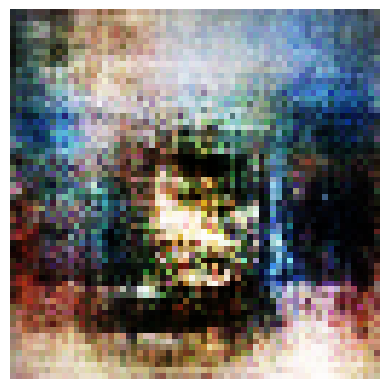

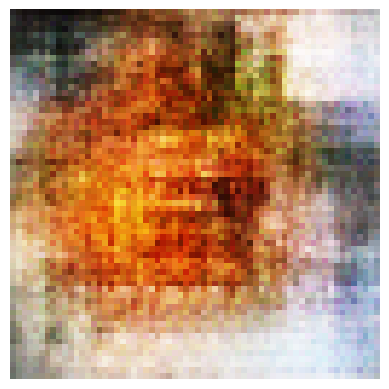

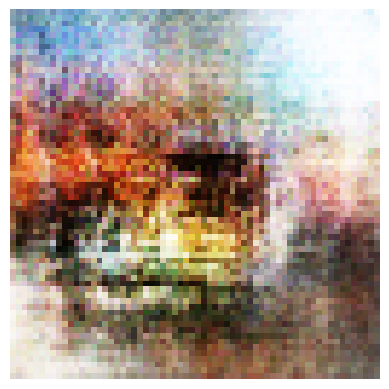

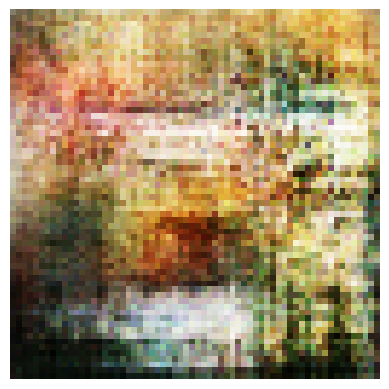

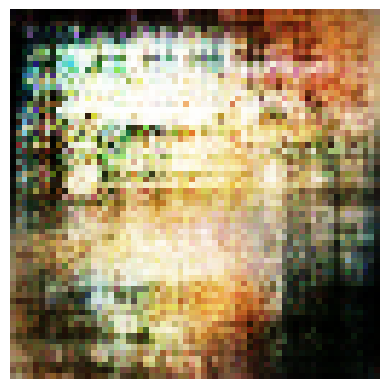

In [17]:
# Generate new images
latent_dim = 100  # Dimensionality of the generator input
num_images_to_generate = 5  # Number of images to generate

# Generate random noise
random_noise = np.random.normal(size=(num_images_to_generate, latent_dim))

# Use the trained generator to generate images
generated_images = generator.predict(random_noise)

# Display or save generated images
for i in range(num_images_to_generate):
    plt.imshow((generated_images[i] + 1) / 2)  # Scale images from [-1, 1] to [0, 1] for display
    plt.axis('off')
    plt.show()

In [18]:
def calculate_inception_score(images, batch_size=32):
    # Load Inception model
    inception_model = tf.keras.applications.InceptionV3(include_top=False, pooling='avg', input_shape=(299, 299, 3))
    
    processed_images = tf.image.resize(images, (299, 299))
    features = inception_model.predict(processed_images, batch_size=batch_size)
    
    score = np.exp(np.mean(np.sum(features * np.log(features + 1e-6), axis=1)))
    
    return score

In [19]:
def calculate_frechet_distance(real_images, generated_images, batch_size=32):
    # Load Inception model
    inception_model = tf.keras.applications.InceptionV3(include_top=False, pooling='avg', input_shape=(299, 299, 3))
    
    real_features = inception_model.predict(tf.image.resize(real_images, (299, 299)), batch_size=batch_size)
    generated_features = inception_model.predict(tf.image.resize(generated_images, (299, 299)), batch_size=batch_size)
    
    mu_real, sigma_real = np.mean(real_features, axis=0), np.cov(real_features, rowvar=False)
    mu_generated, sigma_generated = np.mean(generated_features, axis=0), np.cov(generated_features, rowvar=False)
    
    diff = mu_real - mu_generated
    covmean, _ = linalg.sqrtm(sigma_real.dot(sigma_generated), disp=False)
    
    return np.sum(diff**2) + np.trace(sigma_real + sigma_generated - 2 * covmean)

In [20]:
is_score = calculate_inception_score(generated_images)

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


In [21]:
print(f"Inception Score: {is_score}")

Inception Score: 0.0


In [22]:
from scipy import linalg
val_images,val_labels = image_preprocessing(labels, label_sample_size=10)
fid_score = calculate_frechet_distance(val_images, generated_images)

2/2 ━━━━━━━━━━━━━━━━━━━━ 19s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 625ms/step


In [23]:
print(f"Frechet Inception Distance: {fid_score}")

Frechet Inception Distance: (433.8960156852145-1.6984023318712282e-06j)


In [25]:
generator.save('WGAN_generator.h5')
discriminator.save('WGAN_discriminator.h5')